In [1]:
import os
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
experiment_dir = '../work_dirs/aagcn/aagcn_pyskl_ntu60_xsub_3dkp'

In [3]:
# interests = ['j_0.01_random8_convnew','j_0.01_random8_convnew_gcl']
# names = ['Random8 ConvNew', 'Random8 ConvNew GCL']
interests = ['j_0.01_spatial2_conv','j_0.01_spatial2_conv_gcl']
names = ['3PC 2PC2 Conv', '3PC 2PC2 Conv + GCL']

In [4]:
def accumulateHistory(history):
    train = dict()
    train_gcl = dict()
    valid = dict()
    for entry in history:
        if entry['mode'] == 'train':
            try:
                train[entry['epoch']].append(entry['loss_cls'])
            except KeyError:
                train[entry['epoch']] = [entry['loss_cls']]
            if 'loss_gcl' in entry:
                try:
                    train_gcl[entry['epoch']].append(entry['loss_gcl'])
                except KeyError:
                    train_gcl[entry['epoch']] = [entry['loss_gcl']]
        elif entry['mode'] == 'val':
            valid[entry['epoch']] = entry['top1_acc']
    train = {k: np.mean(v) for k, v in train.items()}
    train_gcl = {k: np.mean(v) for k, v in train_gcl.items()}
    return train, valid, train_gcl

In [5]:
def getLastResult(file_name):
    with open(file_name, 'r') as file:
        data = "\n".join(file.readlines()[-9:])
    top1_accs = re.findall('top1_acc: ([0-9.]+)', data)
    return top1_accs[-2]

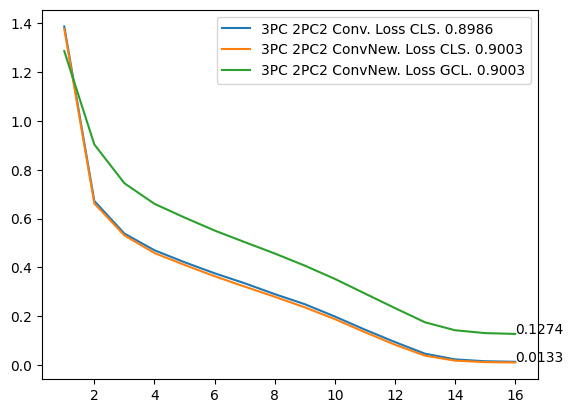

In [6]:
count = 0
for name, interest in zip(names, interests):

    file_template = os.path.join(experiment_dir, interest, "*.log")
    glob_files = glob.glob(file_template)
    glob_files.sort(reverse = True)
    log_file = glob_files[0]
    
    result = getLastResult(log_file)
    file_template = os.path.join(experiment_dir, interest, "*.log.json")
    glob_files = glob.glob(file_template)
    glob_files.sort(reverse = True)
    log_file = glob_files[0]

    
    with open(log_file, 'r') as file:
        history = [json.loads(line.strip()) for line in file.readlines()][1:]
    train, _, train_gcl = accumulateHistory(history)
    epochs = list(train.keys())
    losses = list(train.values())
    plt.plot(epochs, losses, label = f"{name}. Loss CLS. {str(result)}")
    if count == 0:
        plt.text(epochs[-1], losses[-1], round(losses[-1], 4))
        count += 1
    if len(train_gcl.keys()) > 0:
        epochs = list(train_gcl.keys())
        losses = list(train_gcl.values())
        plt.plot(epochs, losses, label = f"{name}. Loss GCL. {str(result)}")
        plt.text(epochs[-1], losses[-1], round(losses[-1], 4))
    plt.legend()
plt.show()

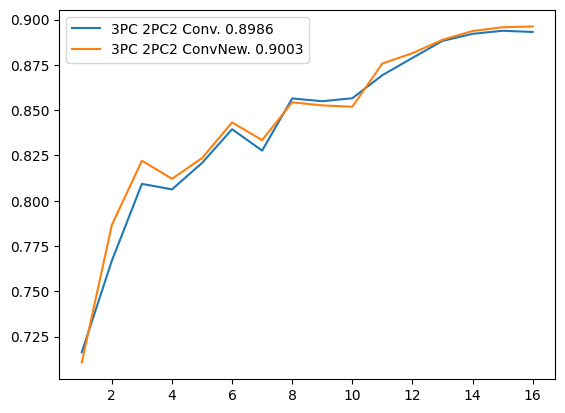

In [7]:
for name, interest in zip(names, interests):

    file_template = os.path.join(experiment_dir, interest, "*.log")
    glob_files = glob.glob(file_template)
    glob_files.sort(reverse = True)
    log_file = glob_files[0]
    
    result = getLastResult(log_file)

    file_template = os.path.join(experiment_dir, interest, "*.log.json")
    glob_files = glob.glob(file_template)
    glob_files.sort(reverse = True)
    log_file = glob_files[0]

    
    with open(log_file, 'r') as file:
        history = [json.loads(line.strip()) for line in file.readlines()][1:]
    _, valid, _ = accumulateHistory(history)
    epochs = list(valid.keys())
    accuracies = list(valid.values())
    plt.plot(epochs, accuracies, label = f"{name}. {str(result)}")
    # plt.text(epochs[-10], accuracies[-1], result)
    plt.legend()
plt.show()